<hr/>
<h3 align="center" style="color:OrangeRed;"> 🔌 Set-up 🔌</h3>
<hr/>


##### Importing Libraries


In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.utils import resample
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Loading Data

In [ ]:
df1 = pd.read_csv("../Data/RTA Dataset.csv")
df1.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


<hr/>
<h3 align="center" style="color:Navy;"> 🔬 EDA 🔬</h3>
<hr/>

In [ ]:
df1.shape

(12316, 32)

In [ ]:
df1.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
df1.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [ ]:
int_cols= df1.dtypes[df1.dtypes == 'int64'].keys()
int_cols

Index(['Number_of_vehicles_involved', 'Number_of_casualties'], dtype='object')

In [ ]:
for col in df1.columns:
  print(col," => ",df1[col].unique())

Time  =>  ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
Day_of_week  =>  ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
Age_band_of_driver  =>  ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Sex_of_driver  =>  ['Male' 'Female' 'Unknown']
Educational_level  =>  ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
Vehicle_driver_relation  =>  ['Employee' 'Unknown' 'Owner' nan 'Other']
Driving_experience  =>  ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
Type_of_vehicle  =>  ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
Owner_of_vehicle  =>  ['Owner' 'Governmental' nan 'Organization' 'Other']
Service_year_of_vehicle  =>  ['Above

* Replace na and nan values with null objects

In [ ]:
nulls = ['na','nan']

df1.replace(nulls, np.nan, inplace = True)
df1.replace('unknown', 'Unknown', inplace = True)
df1.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                 4443
Sex_of_casualty                4443
Age_band_of_casualty           4443
Casualty_severity              4443
Work_of_casuality           

In [ ]:
colnames = df1.isna().sum()/len(df1)
highnull_cols = list(colnames[colnames.values>=0.5].index)
print(highnull_cols)

[]


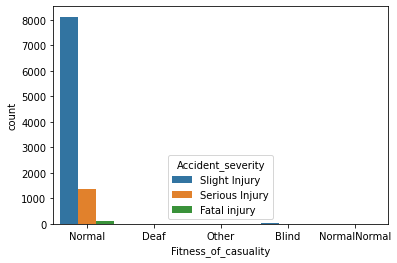

In [ ]:
sns.countplot(x='Fitness_of_casuality',data=df1,hue="Accident_severity")
plt.show()

In [ ]:
df1=df1.replace('NormalNormal','Normal')
df1['Fitness_of_casuality'].unique()

array([nan, 'Normal', 'Deaf', 'Other', 'Blind'], dtype=object)

* As minutes and seconds doesnt matter in the accident severity, concentrating on the hour slot

In [ ]:
df1['Time'] =df1.Time.str.split(':').str[0].astype('int64')
df1['Time'].unique()

array([17,  1, 14, 22,  8, 15, 12, 18, 13, 20, 16, 21,  9, 10, 19, 11, 23,
        7,  0,  5,  6,  4,  3,  2], dtype=int64)

##### Imputing the null values

In [ ]:
obj_cols= df1.dtypes[df1.dtypes == 'object'].keys()
obj_cols

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
df1[obj_cols]=df1[obj_cols].fillna(df1[obj_cols].mode().iloc[0])
df1.isna().any().sum()

0

* Plotting each column for further analysis

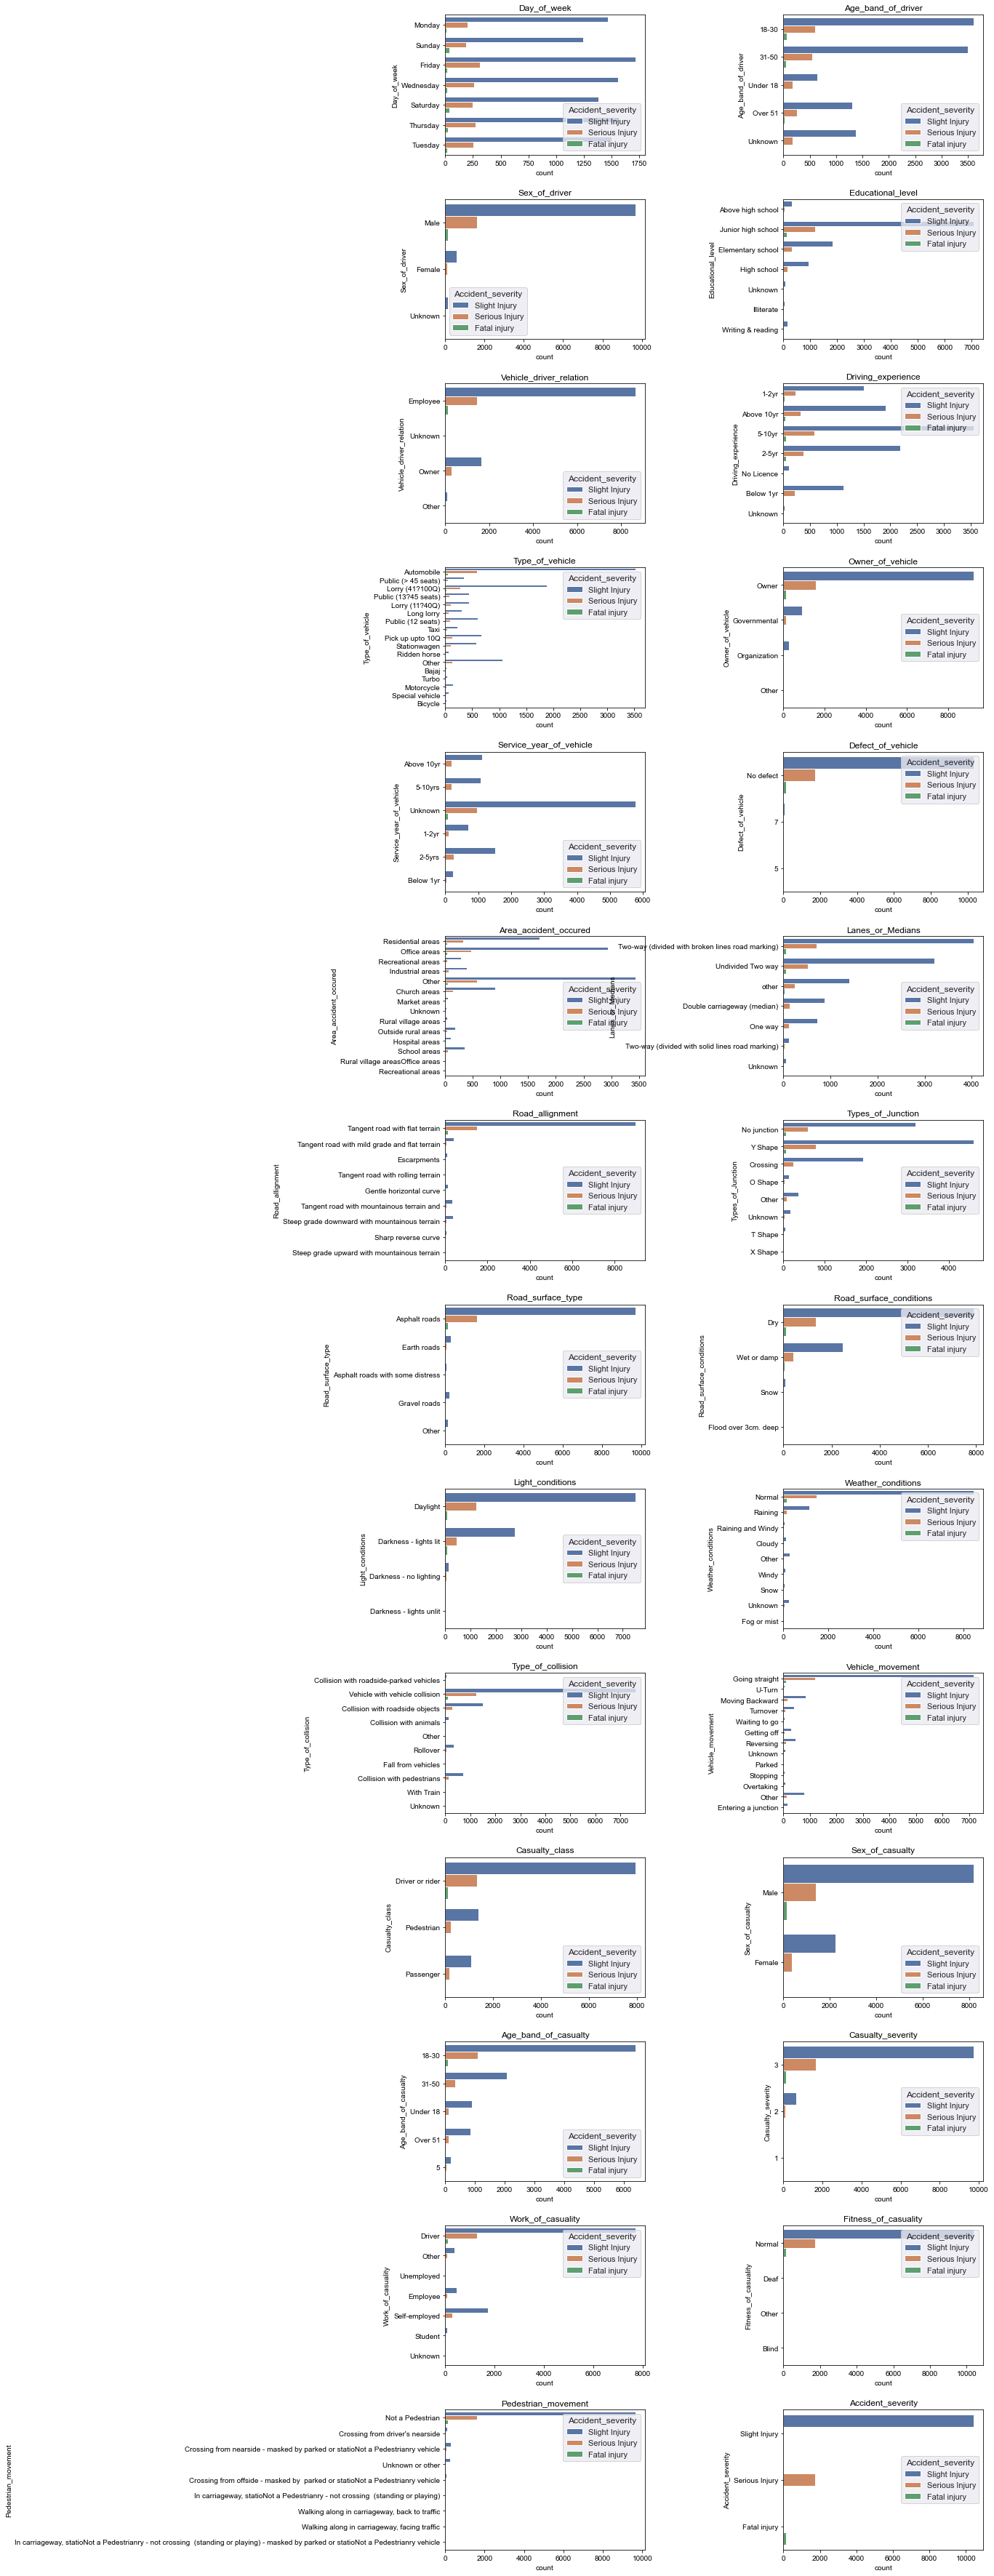

In [ ]:
i=0
fig, axs = plt.subplots(nrows=14, ncols=2,figsize=(11,49))
fig.tight_layout(h_pad=4, w_pad=16)
sns.set(font_scale=1)
for column in df1.select_dtypes(include='object'):
  if df1[column].nunique() < 20:
    axs[i//2,i%2].set_title(column)
    sns.countplot(y=column,data=df1,hue="Accident_severity",ax=axs[i//2,i%2])
    i=i+1
plt.show()

<style>
.green {
    color: #800080;
    font-weight:450;
    font-size: 16px;
    
}
</style>


   
> #####  Observations
>
> <div class="green"> 💭 Mostly the casualty is an employed driver that too of a personal transport. </div>
> <div class="green"> 💭 Accident instigator is mostly with 18-30 age band with junior high school education.</div>
> <div class="green"> 💭 Merging lanes and two-ways(divided and un-divided) lanes are the prime locations of the mishaps.</div>
> <div class="green"> 💭 Usually the day-time is a most probable one with evening peak time.</div>
> <div class="green"> 💭 Frequently, more than 2-vehicles are involved. </div>
> <div class="green"> 💭 2-4 vehicles has the most number of casualties.</div>
> <div class="green"> 💭 No of vehicles in an accident is the highest correlated to the accident severity.</div>
> <div class="green"> 💭 Slight Injury class has more entries than the other two(Serious Injury and Fatal Injury) classes. Hence, the available dataset seems to be imbalanced and can cause overfitting to the majority class.</div>
>



* General Distribution of Data

In [ ]:
df1.describe(include='object').transpose()

,count,unique,top,freq
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,12316,7,Junior high school,8360
Vehicle_driver_relation,12316,4,Employee,10206
Driving_experience,12316,7,5-10yr,4192
Type_of_vehicle,12316,17,Automobile,4155
Owner_of_vehicle,12316,4,Owner,10941
Service_year_of_vehicle,12316,6,Unknown,6811
Defect_of_vehicle,12316,3,No defect,12204


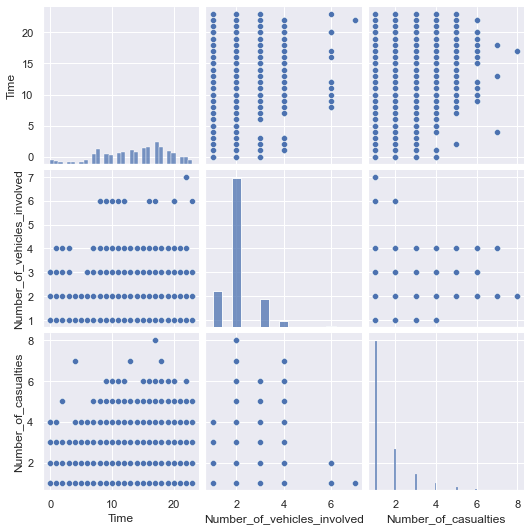

In [ ]:
sns.pairplot(df1)

<hr/>
<h3 align="center" style="color:Brown;"> 🛠️ Pre-processing 🛠️</h3>
<hr/>

##### Label Encoding

In [ ]:

lbl_encoder = LabelEncoder()
cols = df1.loc[:, ~df1.columns.isin(['Number_of_casualties','Number_of_vehicles_involved'])].columns
for col in cols:
  df1[col] = lbl_encoder.fit_transform(df1[col])

* Plotting Heatmap for correlation

<AxesSubplot:>

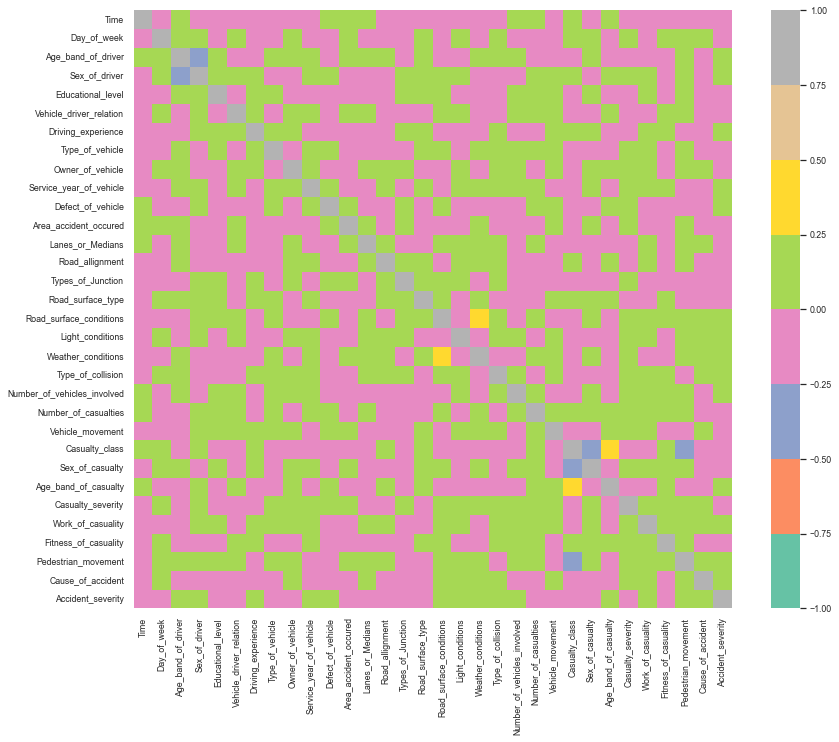

In [ ]:
plt.figure(figsize=(14,11))
sns.set(font_scale=0.8)
sns.heatmap(df1.corr(), linewidths=0, vmin=-1, vmax=1, cmap ='Set2', square = True, cbar=True)

* Removing highly related ones in a group as the group represents the same trend

In [ ]:

def rem_highly_correlated(df):
  cor_matrix = df.corr().abs()
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
  to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
  print(to_drop)
  df_temp = df.drop(df.columns[to_drop], axis=1)
  return df_temp

df2 = rem_highly_correlated(df1)
df2.shape

[]


C:\Users\deepn\AppData\Local\Temp\ipykernel_30652\1400043909.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


(12316, 32)

In [ ]:
cor_matrix = df1.corr()
upper_tri = cor_matrix['Accident_severity']
print(upper_tri.sort_values(axis=0))

Number_of_casualties          -0.045339
Area_accident_occured         -0.018374
Time                          -0.018065
Fitness_of_casuality          -0.012858
Lanes_or_Medians              -0.011844
Vehicle_driver_relation       -0.011253
Owner_of_vehicle              -0.010960
Casualty_severity             -0.010531
Vehicle_movement              -0.010386
Sex_of_casualty               -0.009290
Types_of_Junction             -0.008861
Road_allignment               -0.005967
Road_surface_type             -0.004510
Type_of_vehicle               -0.003709
Day_of_week                   -0.002730
Educational_level             -0.001471
Casualty_class                -0.001312
Service_year_of_vehicle        0.000393
Driving_experience             0.000509
Defect_of_vehicle              0.001889
Work_of_casuality              0.003428
Road_surface_conditions        0.004579
Sex_of_driver                  0.004977
Cause_of_accident              0.008040
Weather_conditions             0.010172


In [ ]:
resultant = pd.DataFrame(data=[(0 for i in range(len(df1.columns))) for i in range(len(df1.columns))],
                         columns=list(df1.columns))
resultant.set_index(pd.Index(list(df1.columns)), inplace = True)

for i in list(df1.columns):
    for j in list(df1.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df1[i]).reshape(-1, 1), np.array(df1[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant['Accident_severity'])

Time                           2.021845e-03
Day_of_week                    9.239380e-01
Age_band_of_driver             1.158903e-02
Sex_of_driver                  9.309081e-01
Educational_level              9.164091e-01
Vehicle_driver_relation        6.906738e-02
Driving_experience             1.054162e-01
Type_of_vehicle                5.834272e-01
Owner_of_vehicle               5.757216e-01
Service_year_of_vehicle        9.905718e-01
Defect_of_vehicle              9.903809e-01
Area_accident_occured          1.639375e-01
Lanes_or_Medians               1.938235e-01
Road_allignment                9.361633e-01
Types_of_Junction              2.136869e-01
Road_surface_type              3.027591e-02
Road_surface_conditions        7.352450e-01
Light_conditions               3.218542e-04
Weather_conditions             5.628891e-01
Type_of_collision              6.421128e-03
Number_of_vehicles_involved    1.573012e-06
Number_of_casualties           7.221136e-15
Vehicle_movement               3

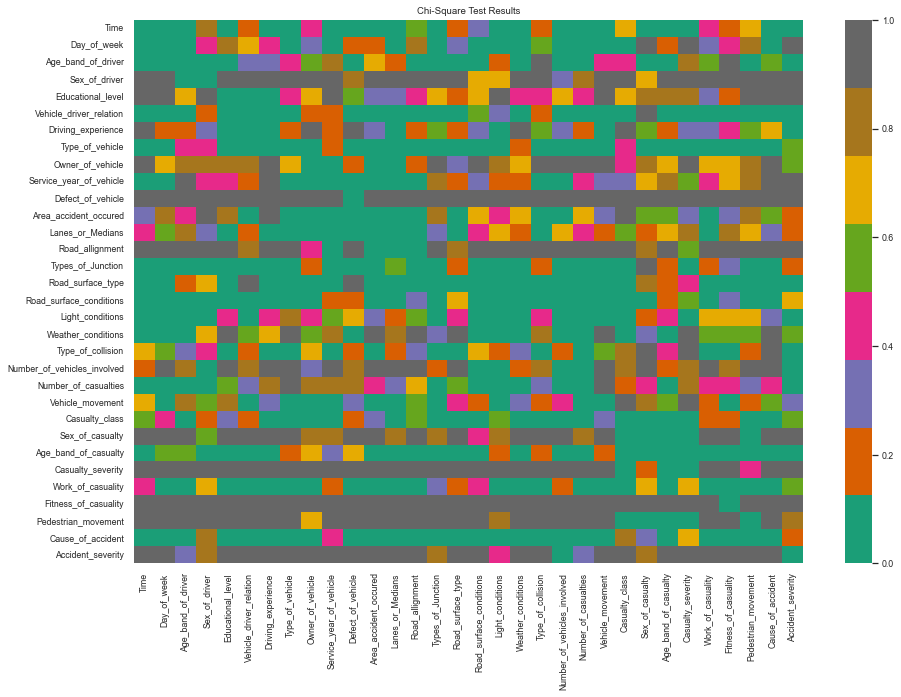

In [ ]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(resultant, annot=False, cmap='Dark2')
plt.title('Chi-Square Test Results')
plt.show()

In [ ]:
resultant['Accident_severity'].sort_values(ascending=False)

Fitness_of_casuality           9.947527e-01
Service_year_of_vehicle        9.905718e-01
Defect_of_vehicle              9.903809e-01
Casualty_severity              9.725680e-01
Road_allignment                9.361633e-01
Sex_of_driver                  9.309081e-01
Day_of_week                    9.239380e-01
Educational_level              9.164091e-01
Sex_of_casualty                8.754103e-01
Pedestrian_movement            8.197631e-01
Road_surface_conditions        7.352450e-01
Casualty_class                 5.907675e-01
Type_of_vehicle                5.834272e-01
Owner_of_vehicle               5.757216e-01
Weather_conditions             5.628891e-01
Work_of_casuality              5.328200e-01
Vehicle_movement               3.327526e-01
Types_of_Junction              2.136869e-01
Cause_of_accident              2.025370e-01
Lanes_or_Medians               1.938235e-01
Area_accident_occured          1.639375e-01
Driving_experience             1.054162e-01
Vehicle_driver_relation        6

In [ ]:
cols=['Fitness_of_casuality', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Casualty_severity', 'Road_allignment', 'Sex_of_driver', 'Day_of_week', 'Educational_level', 'Sex_of_casualty',
      'Pedestrian_movement', 'Road_surface_conditions', 'Casualty_class', 'Type_of_vehicle', 'Owner_of_vehicle', 'Weather_conditions','Accident_severity']
df2 = df1[cols]
df2.columns

Index(['Fitness_of_casuality', 'Service_year_of_vehicle', 'Defect_of_vehicle',
       'Casualty_severity', 'Road_allignment', 'Sex_of_driver', 'Day_of_week',
       'Educational_level', 'Sex_of_casualty', 'Pedestrian_movement',
       'Road_surface_conditions', 'Casualty_class', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Weather_conditions', 'Accident_severity'],
      dtype='object')

In [ ]:
cols = ['Vehicle_movement', 'Types_of_Junction', 'Cause_of_accident', 'Lanes_or_Medians', 'Area_accident_occured', 'Driving_experience', 'Vehicle_driver_relation', 'Road_surface_type',
'Age_band_of_driver', 'Type_of_collision', 'Age_band_of_casualty', 'Time', 'Light_conditions', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Accident_severity']
df3 = df1[cols]
df3.columns

Index(['Vehicle_movement', 'Types_of_Junction', 'Cause_of_accident',
       'Lanes_or_Medians', 'Area_accident_occured', 'Driving_experience',
       'Vehicle_driver_relation', 'Road_surface_type', 'Age_band_of_driver',
       'Type_of_collision', 'Age_band_of_casualty', 'Time', 'Light_conditions',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Accident_severity'],
      dtype='object')

* Separating Target Variable

In [ ]:
Feature=df1.drop(columns=['Accident_severity'], axis=1)
y=df1['Accident_severity']
Feature.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident
0,17,1,0,1,0,0,0,0,3,3,...,2,2,0,1,0,2,0,2,5,9
1,17,1,1,1,4,0,3,11,3,2,...,2,2,0,1,0,2,0,2,5,16
2,17,1,0,1,4,0,0,5,3,5,...,2,2,0,1,1,2,0,2,5,0
3,1,3,0,1,4,0,2,11,0,5,...,2,2,2,0,0,2,0,2,5,1
4,1,3,0,1,4,0,1,0,3,2,...,2,2,0,1,0,2,0,2,5,16


In [ ]:


chi2_selector = SelectKBest(chi2, k=12)
X_kbest = chi2_selector.fit_transform(Feature, y)
print('Original number of features:', df1.shape)
print('Reduced number of features:', X_kbest.shape)

cols_idxs = chi2_selector.get_support(indices=True)
features_new = Feature.iloc[:,cols_idxs]
print(features_new)


Original number of features: (12316, 32)
Reduced number of features: (12316, 12)
       Time  Age_band_of_driver  Vehicle_driver_relation  Driving_experience  \
0        17                   0                        0                   0   
1        17                   1                        0                   3   
2        17                   0                        0                   0   
3         1                   0                        0                   2   
4         1                   0                        0                   1   
...     ...                 ...                      ...                 ...   
12311    16                   1                        0                   1   
12312    18                   4                        0                   2   
12313    13                   2                        0                   2   
12314    13                   0                        0                   3   
12315    13                   0        

In [ ]:
print(features_new.columns)

Index(['Time', 'Age_band_of_driver', 'Vehicle_driver_relation',
       'Driving_experience', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_surface_type', 'Light_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Age_band_of_casualty'],
      dtype='object')


* Scaling the input

In [ ]:

scaler = MinMaxScaler()
# transform data
X = scaler.fit_transform(features_new)
X[0:5]

array([[0.73913043, 0.        , 0.        , 0.        , 0.69230769,
        0.33333333, 0.        , 1.        , 0.33333333, 0.16666667,
        0.14285714, 0.        ],
       [0.73913043, 0.25      , 0.        , 0.5       , 0.46153846,
        0.66666667, 0.        , 1.        , 0.88888889, 0.16666667,
        0.14285714, 0.        ],
       [0.73913043, 0.        , 0.        , 0.        , 0.07692308,
        1.        , 0.        , 1.        , 0.22222222, 0.16666667,
        0.14285714, 0.25      ],
       [0.04347826, 0.        , 0.        , 0.33333333, 0.46153846,
        1.        , 0.5       , 0.        , 0.88888889, 0.16666667,
        0.14285714, 0.        ],
       [0.04347826, 0.        , 0.        , 0.16666667, 0.30769231,
        1.        , 0.        , 0.        , 0.88888889, 0.16666667,
        0.14285714, 0.        ]])

* Splitting the dataset

In [ ]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

* Oversampling the imbalanced data

In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print("Upsampled shape: ", X_train.shape)

Upsampled shape:  (25053, 12)


In [ ]:
with open('../Data/X_train.joblib', 'wb') as f:
    joblib.dump(X_train,f,compress=3)
with open('../Data/X_test.joblib', 'wb') as f:
    joblib.dump(X_test,f,compress=3)
with open('../Data/y_train.joblib', 'wb') as f:
    joblib.dump(y_train,f,compress=3)
with open('../Data/y_test.joblib', 'wb') as f:
    joblib.dump(y_test,f,compress=3)

----
----


In [26]:
with open('/content/drive/My Drive/Data/X_train.joblib', 'r') as a:
  X_train = joblib.load('/content/drive/My Drive/Data/X_train.joblib')

with open('/content/drive/My Drive/Data/X_test.joblib', 'r') as f:
  X_test = joblib.load('/content/drive/My Drive/Data/X_test.joblib')

with open('/content/drive/My Drive/Data/y_train.joblib', 'r') as f:
  y_train = joblib.load('/content/drive/My Drive/Data/y_train.joblib')

with open('/content/drive/My Drive/Data/y_test.joblib', 'r') as f:
  y_test = joblib.load('/content/drive/My Drive/Data/y_test.joblib')


<hr/>
<h3 align="center" style="color:Purple;"> 🏗️ Baseline Modelling 🏗️</h3>
<hr/>

In [ ]:


def trial_models(X_train,y_train,X_test, y_test):
  models =[]

  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  pred = lr.predict(X_test)
  f1 = metrics.f1_score(y_test, pred, average='weighted')
  train_f1 = metrics.f1_score(y_train, lr.predict(X_train), average='weighted')
  print('======================')
  print('Trained LR f1-score {}'.format(train_f1))
  print('Test LR f1-score {}'.format(f1))
  print('LR Accuracy {}'.format(metrics.accuracy_score(y_test, pred)))

  models.append(lr)

  rf = RandomForestClassifier()
  rf.fit(X_train, y_train)
  pred = rf.predict(X_test)
  f1 = metrics.f1_score(y_test, pred, average='weighted')
  train_f1 = metrics.accuracy_score(y_train, rf.predict(X_train))
  print('======================')
  print('Trained RF f1-score {}'.format(train_f1))
  print('Test RF f1-score {}'.format(f1))
  print('RF Accuracy {}'.format(metrics.accuracy_score(y_test, pred)))
  models.append(rf)

  clf = SVC(random_state=0)
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  f1 = metrics.f1_score(y_test, pred, average='weighted')
  train_f1 = metrics.f1_score(y_train, clf.predict(X_train), average='weighted')
  print('======================')
  print('Trained SVC f1-score {}'.format(train_f1))
  print('Test SVC f1-score {}'.format(f1))
  print('SVC Accuracy {}'.format(metrics.accuracy_score(y_test, pred)))
  models.append(clf)


  gbc = GradientBoostingClassifier(random_state=0)
  gbc.fit(X_train, y_train)
  pred = gbc.predict(X_test)
  f1 = metrics.f1_score(y_test, pred, average='weighted')
  train_f1 = metrics.f1_score(y_train, gbc.predict(X_train), average='weighted')
  print('======================')
  print('Trained GBC f1-score {}'.format(train_f1))
  print('Test GBC f1-score {}'.format(f1))
  print('GBC Accuracy {}'.format(metrics.accuracy_score(y_test, pred)))
  models.append(gbc)

  extree = ExtraTreesClassifier()
  extree.fit(X_train, y_train)
  y_pred = extree.predict(X_test)
  f1 = metrics.f1_score(y_test, pred, average='weighted')
  train_f1 = metrics.f1_score(y_train, extree.predict(X_train), average='weighted')
  print('======================')
  print('Trained ExTree f1-score {}'.format(train_f1))
  print('Test ExTree f1-score {}'.format(f1))
  print('ExTree Accuracy {}'.format(metrics.accuracy_score(y_test, pred)))
  models.append(extree)

  return models

In [ ]:
models = trial_models(X_train,y_train,X_test, y_test)

Trained LR f1-score 0.47276886953395203
Test LR f1-score 0.5405800631768165
LR Accuracy 0.450487012987013
Trained RF f1-score 0.997245838821698
Test RF f1-score 0.784587409431058
RF Accuracy 0.8295454545454546
Trained SVC f1-score 0.7012794192623102
Test SVC f1-score 0.5795355331635847
SVC Accuracy 0.5012175324675324
Trained GBC f1-score 0.866600576390453
Test GBC f1-score 0.7747309117060153
GBC Accuracy 0.8198051948051948
Trained ExTree f1-score 0.9972451401150849
Test ExTree f1-score 0.7747309117060153
ExTree Accuracy 0.8198051948051948


In [ ]:
models = trial_models(X_train,y_train,X_test, y_test)

Trained LR f1-score 0.49358847050701476
Test LR f1-score 0.5444194192640701
LR Accuracy 0.45089285714285715
Trained RF f1-score 0.9972398895955839
Test RF f1-score 0.7907000955648554
RF Accuracy 0.8336038961038961
Trained SVC f1-score 0.6906327591763671
Test SVC f1-score 0.6050316007178831
SVC Accuracy 0.5263798701298701
Trained GBC f1-score 0.845000049723287
Test GBC f1-score 0.7820034542892228
GBC Accuracy 0.8340097402597403
Trained ExTree f1-score 0.9972395840363164
Test ExTree f1-score 0.7820034542892228
ExTree Accuracy 0.8340097402597403


In [ ]:
print(models[3])
models[3].get_params()

GradientBoostingClassifier(random_state=0)


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
with open("../Models/models.pickle", "wb") as f:
            pickle.dump(models, f, protocol=pickle.HIGHEST_PROTOCOL)

----
----

In [27]:
with open("/content/drive/My Drive/Models/models.pickle", 'rb') as f:
  models = pickle.load(f)

In [28]:
models[1].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

> Selecting Random Forest, ExTree and GRadient Boosting classifier for further hyper-tuning after comparing its performances.

<hr/>
<h3 align="center" style="color:DarkBlue;"> 🪛 Hyper-parameter Tuning 🪛</h3>
<hr/>

##### Gradient Boosting Classifier

In [ ]:
skf = KFold(n_splits=5, shuffle=True, random_state=9)

gbc = models[3]
params={'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 120, num = 20)], 'learning_rate':[0.03,0.05]}
grid_gbc = GridSearchCV(estimator = gbc, param_grid = params, cv = skf, verbose=2, n_jobs = -1, scoring='f1_weighted')
grid_gbc.fit(X_train, y_train)
pred = grid_gbc.predict(X_test)
f1 = metrics.f1_score(y_test, pred, average='weighted')
print('Gradient Boosting Classifier parameters are {}'.format(grid_gbc.best_params_))
print('Best f1-weighted score {}'.format(grid_gbc.best_score_))
print('F1_test set is {}'.format(f1))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


Gradient Boosting Classifier parameters are {'learning_rate': 0.05, 'n_estimators': 120}
Best f1-weighted score 0.8165940442265649
F1_test set is 0.7708981762785884


##### Random Forest Classifier

In [30]:
skf = KFold(n_splits=5, shuffle=True, random_state=9)

rf = models[1]
params={'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 120, num = 20)]}
grid_rf = GridSearchCV(estimator = rf, param_grid = params, cv = skf, verbose=2, n_jobs = -1, scoring='f1_weighted')
grid_rf.fit(X_train, y_train)
pred = grid_rf.predict(X_test)
f1 = metrics.f1_score(y_test, pred, average='weighted')
print('Random Forest Classifier parameters are {}'.format(grid_rf.best_params_))
print('Best f1-weighted score {}'.format(grid_rf.best_score_))
print('F1_test set is {}'.format(f1))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Forest Classifier parameters are {'n_estimators': 114}
Best f1-weighted score 0.9399359303912203
F1_test set is 0.7811751670217071


##### Extree Classifier

In [32]:
#skf3 = KFold(n_splits=5, shuffle=True, random_state=9)

ext = models[4]
params={'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 120, num = 20)]}
grid_ext = GridSearchCV(estimator = ext, param_grid = params, cv = skf, verbose=2, n_jobs = -1, scoring='f1_weighted')
grid_ext.fit(X_train, y_train)
pred = grid_ext.predict(X_test)
f1 = metrics.f1_score(y_test, pred, average='weighted')
print('ExTrees Classifier parameters are {}'.format(grid_ext.best_params_))
print('Best f1-weighted score {}'.format(grid_ext.best_score_))
print('F1_test set is {}'.format(f1))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
ExTrees Classifier parameters are {'n_estimators': 113}
Best f1-weighted score 0.9570761225105731
F1_test set is 0.7781416517965123


In [ ]:

with open('../Models/models.joblib', 'wb') as f:
    joblib.dump(models,f,compress=3)
with open('../Models/grid_gbc.joblib', 'wb') as f:
    joblib.dump(grid_gbc,f,compress=3)

<hr/>
<h3 align="center" style="color:Tomato;"> 🏛️ Final Model 🏛️</h3>
<hr/>

In [35]:
skf = KFold(n_splits=7, shuffle=True, random_state=9)

rf = models[1]
params={'n_estimators': [int(x) for x in np.linspace(start = 114, stop = 134, num = 20)]}
grid_rf = GridSearchCV(estimator = rf, param_grid = params, cv = skf, verbose=2, n_jobs = -1, scoring='f1_weighted')
grid_rf.fit(X_train, y_train)
pred = grid_rf.predict(X_test)
f1 = metrics.f1_score(y_test, pred, average='weighted')
print('Random Forest Classifier parameters are {}'.format(grid_rf.best_params_))
print('Best f1-weighted score {}'.format(grid_rf.best_score_))
print('F1_test set is {}'.format(f1))

Fitting 7 folds for each of 20 candidates, totalling 140 fits
Random Forest Classifier parameters are {'n_estimators': 131}
Best f1-weighted score 0.9410671830971401
F1_test set is 0.7811651084583704


In [36]:
final = grid_rf.best_estimator_

In [37]:
final.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 131,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<hr/>
<h3 align="center" style="color:DarkPink;"> 🏆 Performance 🏆</h3>
<hr/>

In [42]:
print('On Testing Data')
print('Accuracy = {}'.format(metrics.accuracy_score(y_test, pred)))
print('F1-score = {}'.format(metrics.f1_score(y_test, pred, average='weighted')))

On Testing Data
Accuracy = 0.827922077922078
F1-score = 0.7811651084583704


In [46]:
pred = final.predict(X_test)

In [47]:
target=['Slight Injury','Serious Injury','Fatal injury']

print('=== TEST DATA ===')
print(metrics.classification_report(y_test, pred,target_names=target))

=== TEST DATA ===
                precision    recall  f1-score   support

 Slight Injury       0.25      0.03      0.05        37
Serious Injury       0.37      0.10      0.15       363
  Fatal injury       0.85      0.97      0.90      2064

      accuracy                           0.83      2464
     macro avg       0.49      0.36      0.37      2464
  weighted avg       0.77      0.83      0.78      2464



<Axes: >

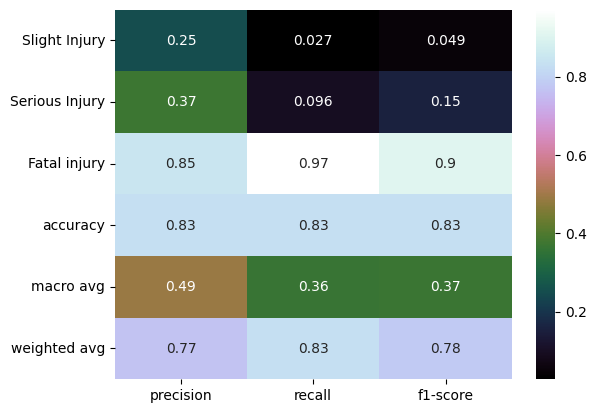

In [50]:
clf_report = metrics.classification_report(y_test, pred,output_dict=True,target_names=target)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap='cubehelix')

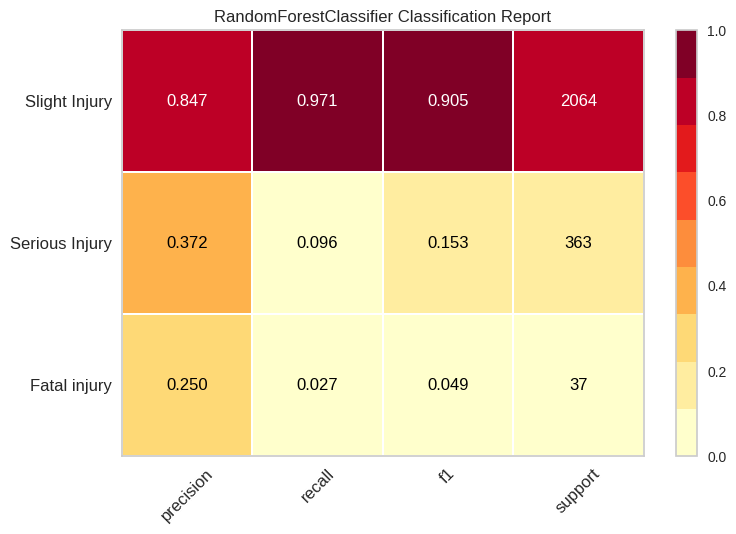

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [51]:
from yellowbrick.classifier import ClassificationReport

classes = ['Fatal injury', 'Serious Injury', 'Slight Injury' ]
visualizer = ClassificationReport(final, classes=classes, support=True)


visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

* Saving the model

In [54]:
output = open('/content/drive/My Drive/Models/final.pickle', 'wb')
pickle.dump(final,output)


<hr/>
<h3 align="center" style="color:Maroon;"> 🏵️ Explainable AI 🏵️</h3>
<hr/>

In [57]:
!pip install shap
import shap
shap.initjs()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.4 MB/s eta 0:00:00


In [59]:
features = ['Time', 'Age_band_of_driver', 'Vehicle_driver_relation',
       'Driving_experience', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_surface_type', 'Light_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Age_band_of_casualty']

In [60]:
with open("/content/drive/My Drive/Data/df1.pickle", 'rb') as f:
  Feature = pickle.load(f)

In [61]:
X_sample = Feature[features].sample(100)
X_sample


,Time,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Road_surface_type,Light_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_casualty
4766,9,4,0,2,6,4,0,3,6,1,1,0
4675,12,0,0,4,9,2,0,3,8,2,1,0
10254,9,1,0,3,6,4,1,3,8,2,1,0
2691,17,4,0,0,6,6,0,3,8,1,1,0
2836,17,0,2,4,6,0,0,3,8,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
629,22,0,0,3,6,4,0,2,8,2,1,1
8197,7,1,0,4,6,6,0,3,1,2,1,0
7767,15,1,0,0,5,2,0,3,1,2,2,4
506,12,4,0,0,6,1,0,3,8,4,1,1


In [62]:
shap_values = shap.TreeExplainer(final).shap_values(X_sample)

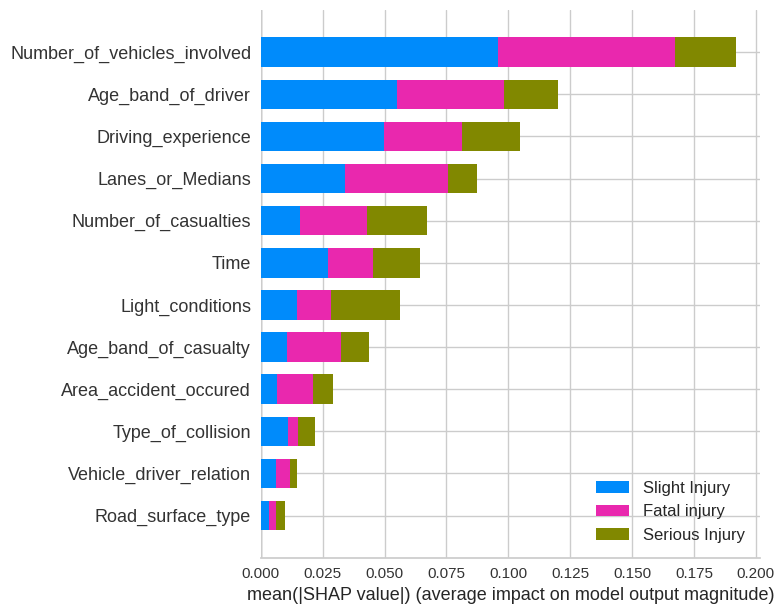

In [76]:
shap.summary_plot(shap_values, X_sample, plot_type="bar",class_names=target)

In [66]:
shap.initjs()
shap.force_plot(shap.TreeExplainer(final).expected_value[0], shap_values[0][:], X_sample)

In [68]:
shap.initjs()
print(pred[50])
shap.force_plot(shap.TreeExplainer(final).expected_value[0], shap_values[1][50], X_sample.iloc[50])

2


In [69]:
shap.initjs()
i=17
print(pred[i])
shap.force_plot(shap.TreeExplainer(final).expected_value[0], shap_values[0][i], X_sample.values[i], feature_names = X_sample.columns)

2


2


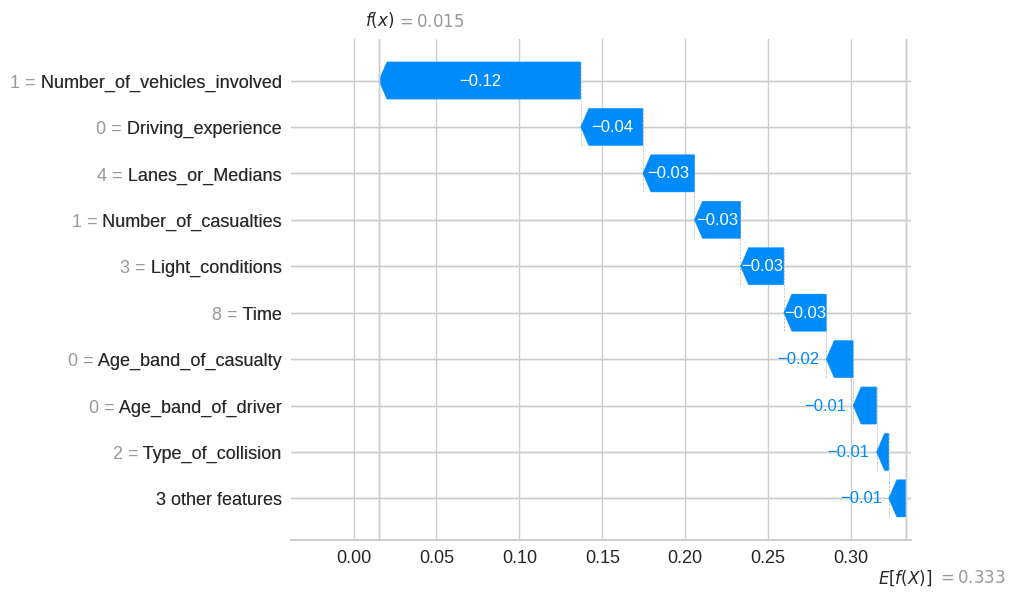

In [70]:
row = 32
print(pred[row])

shap.waterfall_plot(shap.Explanation(values=shap_values[0][row],
                                              base_values=shap.TreeExplainer(final).expected_value[0], data=X_sample.iloc[row],
                                         feature_names=X_sample.columns.tolist()))

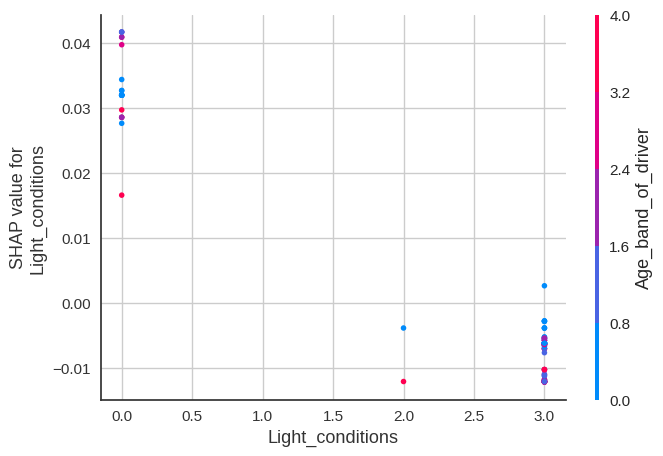

In [72]:
shap.dependence_plot('Light_conditions', shap_values[2], X_sample)

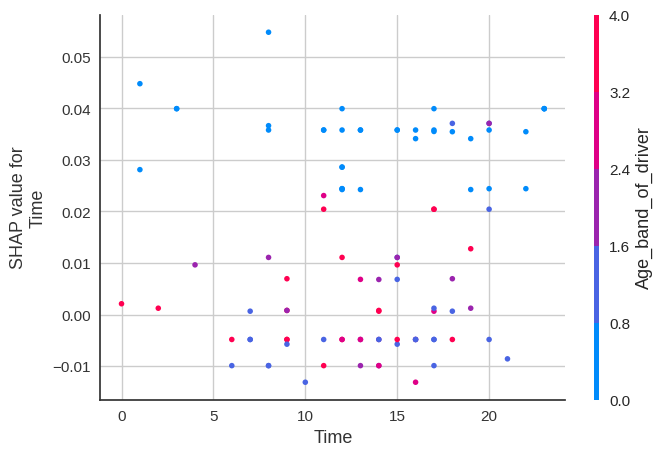

In [73]:
shap.dependence_plot('Time', shap_values[2], X_sample)

2


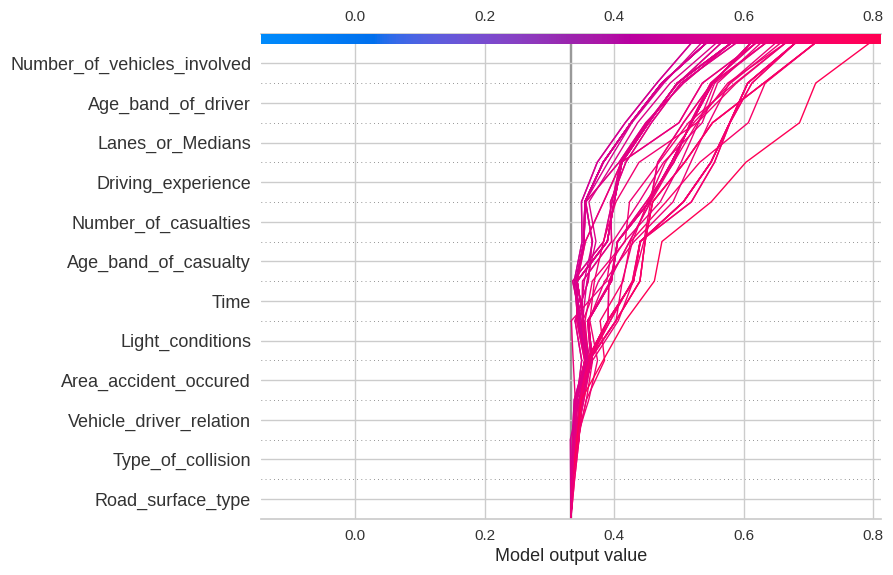

In [74]:
i=58
print(pred[i])
shap.decision_plot(shap.TreeExplainer(final).expected_value[0],
                   shap_values[2][:i],
                   feature_names=X_sample.columns.tolist())